### Desafío Integrador
#### Análisis de las producciones del personal de Ciencia y Tecnología

### Etapa 3: Desarrollo de un modelo para determinar si las personas harán publicaciones en general

#### 1. Lectura e interpretación de la tabla

In [1]:
#Se importa la funcionalidad necesaria
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,roc_curve,auc,roc_auc_score
from sklearn.metrics import precision_score, recall_score,accuracy_score
from sklearn.linear_model  import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
#Lectura del archivo
df=pd.read_csv('personas_publico_articulo.csv')
df_original=df
df.head()

,Unnamed: 0,actividad_evaluacion_comite_editorial_internacional,actividad_evaluacion_comite_editorial_nacional,actividad_evaluacion_proyectos,actividad_evaluacion_referato_internacional,actividad_evaluacion_referato_nacional,actividad_evaluacion_rrhh_becarios,actividad_evaluacion_rrhh_investigadores,actividad_evaluacion_rrhh_premios,formacion_participacion_conferencia,...,prod_2_años_ant,prod_3_años_ant,max_grado_academico,gran_area_experticia,tipo_personal,condicion_docente,ded_horaria_docente,clase_cargo_docente,categoria_conicet,rango_edad
0,8,0,0,0,0,0,0,0,0,0,...,0.0,1.0,Universitario de posgrado/maestría,CIENCIAS MÉDICAS Y DE LA SALUD,INVESTIGADOR,Interino,De 0 hasta 19 horas,Profesor adjunto,No pertenece a Conicet,"(50, 60]"
1,9,0,0,0,1,0,0,0,0,0,...,1.0,0.0,Universitario de posgrado/doctorado,CIENCIAS NATURALES Y EXACTAS,INVESTIGADOR,Regular o por concurso,40 horas o más,Profesor adjunto,Investigador independiente,"(50, 60]"
2,16,0,0,0,0,0,0,0,0,0,...,0.0,0.0,Universitario de grado,CIENCIAS NATURALES Y EXACTAS,OTRO PERSONAL DE LA INSTITUCION,no docente,0,no docente,No pertenece a Conicet,"(50, 60]"
3,27,0,0,1,0,0,1,1,0,0,...,4.0,2.0,Universitario de posgrado/maestría,CIENCIAS SOCIALES,INVESTIGADOR,Regular o por concurso,De 0 hasta 19 horas,Ayudante de segunda,No pertenece a Conicet,"(30, 40]"
4,28,0,0,0,0,0,0,0,0,0,...,1.0,0.0,Universitario de grado,CIENCIAS NATURALES Y EXACTAS,OTRO PERSONAL DE LA INSTITUCION,no docente,0,no docente,No pertenece a Conicet,"(30, 40]"


In [3]:
df.drop(columns='Unnamed: 0',inplace=True)

#### 2. Generación de dummies

In [4]:
#Se generan dummies para sexo 
df_dummies = pd.get_dummies(df['sexo'], prefix='sexo',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='sexo',inplace=True)

In [5]:
#Se generan dummies para rango_edad 
df_dummies = pd.get_dummies(df['rango_edad'], prefix='edad',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='rango_edad',inplace=True)

In [6]:
#Se generan dummies para tipo_personal
df_dummies = pd.get_dummies(df['tipo_personal'], prefix='t_personal',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='tipo_personal',inplace=True)

In [7]:
#Se generan dummies para condicion_docente
df_dummies = pd.get_dummies(df['condicion_docente'], prefix='cond_docente',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='condicion_docente',inplace=True)

In [8]:
#Se generan dummies para ded_horaria_docente
df_dummies = pd.get_dummies(df['ded_horaria_docente'], prefix='ded_horaria',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='ded_horaria_docente',inplace=True)

In [9]:
#Se generan dummies para max_grado_academico
df_dummies = pd.get_dummies(df['max_grado_academico'], prefix='grado_acad',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='max_grado_academico',inplace=True)

In [10]:
#Se generan dummies para categoria_conicet
df_dummies = pd.get_dummies(df['categoria_conicet'], prefix='cat_conicet',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='categoria_conicet',inplace=True)

In [11]:
#Se generan dummies para clase_cargo_docente
df_dummies = pd.get_dummies(df['clase_cargo_docente'], prefix='clase_cargo_docente',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='clase_cargo_docente',inplace=True)

In [12]:
#Se prueba un primer modelo tomando de las opciones de área la más abarcativa (gran area experticia)
#Se generan dummies para 'gran_area_experticia'
df_dummies = pd.get_dummies(df['gran_area_experticia'], prefix='area_exp',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='gran_area_experticia',inplace=True)

In [13]:
for i in df.columns:
    print(i)

actividad_evaluacion_comite_editorial_internacional
actividad_evaluacion_comite_editorial_nacional
actividad_evaluacion_proyectos
actividad_evaluacion_referato_internacional
actividad_evaluacion_referato_nacional
actividad_evaluacion_rrhh_becarios
actividad_evaluacion_rrhh_investigadores
actividad_evaluacion_rrhh_premios
formacion_participacion_conferencia
formacion_participacion_taller
membresia_asociaciones_cyt
movilidad_estancias_exterior
movilidad_posdoctorado_exterior
movilidad_posgrado_exterior
persona_id
produccion_cantidad_articulos_total
produccion_cantidad_libros
produccion_patentes_otorgadas
produccion_patentes_solicitadas
produccion_publicacion_congreso
proyectos_direccion
proyectos_financiamiento_externo
publico_articulos
cant_articulos_prestigio
publico_prestigio
prod_ultimo_año
prod_año_ant
prod_2_años_ant
prod_3_años_ant
sexo_M
edad_(20, 30]
edad_(30, 40]
edad_(40, 50]
edad_(50, 60]
edad_(60, 70]
edad_(70, 80]
edad_(80, 90]
t_personal_DOCENTE
t_personal_INVESTIGADOR
t_p

In [14]:
#Se define la matriz target y la matriz de features
X=df.drop(columns=[ 'publico_articulos','cant_articulos_prestigio',
       'publico_prestigio','produccion_cantidad_articulos_total','persona_id'])

y =df['publico_articulos']


In [15]:
for i in X.columns:
    print(i)

actividad_evaluacion_comite_editorial_internacional
actividad_evaluacion_comite_editorial_nacional
actividad_evaluacion_proyectos
actividad_evaluacion_referato_internacional
actividad_evaluacion_referato_nacional
actividad_evaluacion_rrhh_becarios
actividad_evaluacion_rrhh_investigadores
actividad_evaluacion_rrhh_premios
formacion_participacion_conferencia
formacion_participacion_taller
membresia_asociaciones_cyt
movilidad_estancias_exterior
movilidad_posdoctorado_exterior
movilidad_posgrado_exterior
produccion_cantidad_libros
produccion_patentes_otorgadas
produccion_patentes_solicitadas
produccion_publicacion_congreso
proyectos_direccion
proyectos_financiamiento_externo
prod_ultimo_año
prod_año_ant
prod_2_años_ant
prod_3_años_ant
sexo_M
edad_(20, 30]
edad_(30, 40]
edad_(40, 50]
edad_(50, 60]
edad_(60, 70]
edad_(70, 80]
edad_(80, 90]
t_personal_DOCENTE
t_personal_INVESTIGADOR
t_personal_OTRO PERSONAL DE LA INSTITUCION
cond_docente_Por contrato
cond_docente_Regular o por concurso
cond_d

In [16]:
# Hacemos el split entre train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

#### 3. Regresión logística

In [17]:
#Se hace GridSearch para Logistic Regression

X_train['prod_ultimo_año']=scaler.fit_transform(X_train[['prod_ultimo_año']])
X_train['prod_año_ant']=scaler.fit_transform(X_train[['prod_año_ant']])
X_train['prod_2_años_ant']=scaler.fit_transform(X_train[['prod_2_años_ant']])
X_train['prod_3_años_ant']=scaler.fit_transform(X_train[['prod_3_años_ant']])
X_train['produccion_cantidad_libros']=scaler.fit_transform(X_train[['produccion_cantidad_libros']])
X_train['produccion_patentes_otorgadas']=scaler.fit_transform(X_train[['produccion_patentes_otorgadas']])
X_train['produccion_patentes_solicitadas']=scaler.fit_transform(X_train[['produccion_patentes_solicitadas']])


X_test['prod_ultimo_año']=scaler.transform(X_test[['prod_ultimo_año']])
X_test['prod_año_ant']=scaler.transform(X_test[['prod_año_ant']])
X_test['prod_2_años_ant']=scaler.transform(X_test[['prod_2_años_ant']])
X_test['prod_3_años_ant']=scaler.transform(X_test[['prod_3_años_ant']])
X_test['produccion_cantidad_libros']=scaler.transform(X_test[['produccion_cantidad_libros']])
X_test['produccion_patentes_otorgadas']=scaler.transform(X_test[['produccion_patentes_otorgadas']])
X_test['produccion_patentes_solicitadas']=scaler.transform(X_test[['produccion_patentes_solicitadas']])


modelo_LR_publico =  LogisticRegression()

hyperparameters = {'C': np.logspace(0, 4, 8), 
                   'penalty': ['l1', 'l2']}

clasificador = GridSearchCV(modelo_LR_publico, hyperparameters, cv=5, verbose=0)

mejor_modelo_LR_publico = clasificador.fit(X_train, y_train)

print('Mejor Penalización:', mejor_modelo_LR_publico.best_estimator_.get_params()['penalty'])
print('Mejor C:', mejor_modelo_LR_publico.best_estimator_.get_params()['C'])

mejor_modelo_LR_publico.best_score_



Mejor Penalización: l2
Mejor C: 1.0


0.7864795918367347

In [18]:
#Se genera el modelo
modelo_LR_publico =  LogisticRegression(penalty='l2',C=1)
modelo_LR_publico.fit(X_train,y_train)
y_pred_LR_publico=modelo_LR_publico.predict(X_test)

print(accuracy_score(y_test, y_pred_LR_publico))
print(recall_score(y_test, y_pred_LR_publico))
print(precision_score(y_test, y_pred_LR_publico))


0.7182442056195779
0.9213951067152525
0.6538603620243812


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_LR_publico))

             precision    recall  f1-score   support

          0       0.87      0.52      0.65      7762
          1       0.65      0.92      0.76      7684

avg / total       0.76      0.72      0.71     15446



0.7182442056195779


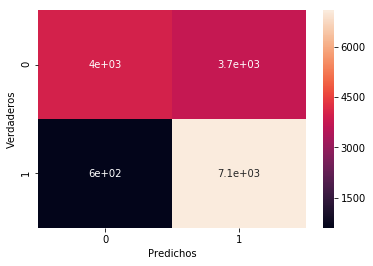

In [20]:
# Elaboramos la matriz de confusión:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test, y_pred_LR_publico)

sns.heatmap(confusion_matrix(y_test, y_pred_LR_publico), annot=True)

print(accuracy_score(y_test, y_pred_LR_publico))
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [21]:
#Curva ROC
y_probs_logit = modelo_LR_publico.predict_proba(X_test)
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_probs_logit[:,1])
df_RL = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
df_RL.head()

,fpr,tpr,thr
0,0.000000,0.000000,2.0
1,0.053723,0.448334,1.0
2,0.055785,0.458615,1.0
3,0.057459,0.464081,1.0
4,0.058619,0.467465,1.0


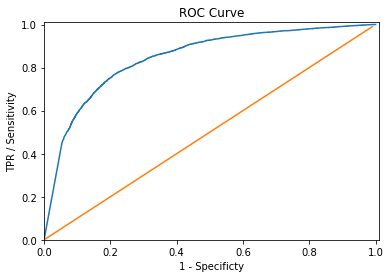

In [22]:
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_RL['fpr'],df_RL['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

In [23]:
print('AUC=', auc(fpr_log, tpr_log))

AUC= 0.8460807892828299


In [24]:
X_test.shape,X_test.shape

((15446, 124), (15446, 124))

In [25]:
coef=pd.DataFrame(X_test.columns,columns=['Feature'])
coef['ponderador']=modelo_LR_publico.coef_.reshape(124,1)

In [26]:
coef.sort_values(by='ponderador',ascending=False)

,Feature,ponderador
1,actividad_evaluacion_comite_editorial_nacional,2.238746
3,actividad_evaluacion_referato_internacional,1.305469
25,"edad_(20, 30]",1.159704
44,grado_acad_Universitario de posgrado/doctorado,1.067905
20,prod_ultimo_año,1.060905
50,cat_conicet_Investigador asistente,1.053444
87,clase_cargo_docente_Docente Adscripto,0.936653
4,actividad_evaluacion_referato_nacional,0.808782
76,clase_cargo_docente_Ayudante adscripto,0.801791
90,clase_cargo_docente_Docente invitado,0.774138


#### 4. Árboles de decisión

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

In [28]:
def evaluar_rendimiento(modelo, nombre):
    s = cross_val_score(modelo, X_train, y_train, cv=5, n_jobs=-1)
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))


In [29]:
dt = DecisionTreeClassifier(class_weight='balanced')
bdt = BaggingClassifier(DecisionTreeClassifier())
rf = RandomForestClassifier(class_weight='balanced')
et = ExtraTreesClassifier(class_weight='balanced')

evaluar_rendimiento(dt,  "Árbol de decisión")
evaluar_rendimiento(bdt, "Bagging AD")
evaluar_rendimiento(rf,  "Random Forest")
evaluar_rendimiento(et,  "Extra Trees")

Rendimiento de Árbol de decisión:	0.72 ± 0.002
Rendimiento de Bagging AD:	0.755 ± 0.005
Rendimiento de Random Forest:	0.762 ± 0.002
Rendimiento de Extra Trees:	0.755 ± 0.002


In [30]:
dt.fit(X_train,y_train)
bdt.fit(X_train,y_train)
rf.fit(X_train,y_train)
et.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [31]:
dt_pred=dt.predict(X_test)
bdt_pred=bdt.predict(X_test)
rf_pred=rf.predict(X_test)
et_pred=et.predict(X_test)

In [32]:
print(precision_score(y_test, dt_pred))
print(precision_score(y_test, bdt_pred))
print(precision_score(y_test, rf_pred))
print(precision_score(y_test, et_pred))

0.5715513947267864
0.6044340723453909
0.6019571541920127
0.6284741395177619


In [33]:
#Aplicamos GridSearch para el modelo de árboles que mejor nos dio
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_trees = {'n_estimators': [50, 100, 200], 
               'max_features': [1, 5, 8, 10, 21], 
               'max_depth': [5, 20, 50, 70, 100], 
               'min_samples_leaf':[1, 5, 8, 10, 50]}

In [34]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
et = ExtraTreesClassifier(class_weight='balanced')
kf = StratifiedKFold(n_splits=3, shuffle=True)

In [35]:
grid_search_et = GridSearchCV(et, param_grid=param_trees, cv=kf, verbose=1, n_jobs=3)

In [36]:
grid_search_et.fit(X_train, y_train)

Fitting 3 folds for each of 375 candidates, totalling 1125 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   28.4s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  4.0min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed: 18.6min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed: 42.7min
[Parallel(n_jobs=3)]: Done 1125 out of 1125 | elapsed: 65.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
       error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'n_estimators': [50, 100, 200], 'max_features': [1, 5, 8, 10, 21], 'max_depth': [5, 20, 50, 70, 100], 'min_samples_leaf': [1, 5, 8, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [37]:
y_pred_et_publico=grid_search_et.predict(X_test)

In [38]:
print(accuracy_score(y_test, y_pred_et_publico))
print(recall_score(y_test, y_pred_et_publico))
print(precision_score(y_test, y_pred_et_publico))

0.6605593681211964
0.9521082769390942
0.6001148388155196


#### 5. XGBoost

In [39]:
from xgboost.sklearn import XGBClassifier,XGBRFRegressor
import scipy.stats as st

In [40]:
modelo_xgb_publico = XGBClassifier(nthreads=-1)

In [41]:
one_to_left = st.beta(10, 1)

In [42]:
params = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)
    "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
    'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
    "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
}

In [43]:
xgb = RandomizedSearchCV(modelo_xgb_publico,params, n_iter=25, verbose= True)

In [44]:
for i in X_train.columns:
    print(i)

actividad_evaluacion_comite_editorial_internacional
actividad_evaluacion_comite_editorial_nacional
actividad_evaluacion_proyectos
actividad_evaluacion_referato_internacional
actividad_evaluacion_referato_nacional
actividad_evaluacion_rrhh_becarios
actividad_evaluacion_rrhh_investigadores
actividad_evaluacion_rrhh_premios
formacion_participacion_conferencia
formacion_participacion_taller
membresia_asociaciones_cyt
movilidad_estancias_exterior
movilidad_posdoctorado_exterior
movilidad_posgrado_exterior
produccion_cantidad_libros
produccion_patentes_otorgadas
produccion_patentes_solicitadas
produccion_publicacion_congreso
proyectos_direccion
proyectos_financiamiento_externo
prod_ultimo_año
prod_año_ant
prod_2_años_ant
prod_3_años_ant
sexo_M
edad_(20, 30]
edad_(30, 40]
edad_(40, 50]
edad_(50, 60]
edad_(60, 70]
edad_(70, 80]
edad_(80, 90]
t_personal_DOCENTE
t_personal_INVESTIGADOR
t_personal_OTRO PERSONAL DE LA INSTITUCION
cond_docente_Por contrato
cond_docente_Regular o por concurso
cond_d

In [45]:
X_test_xgb=X_test.rename(columns={"edad_(20, 30]": "edad_20_30",
                       "edad_(30, 40]": "edad_30_40",
                       "edad_(40, 50]": "edad_40_50",
                       "edad_(50, 60]": "edad_50_60",
                       "edad_(60, 70]": "edad_60_70",
                       "edad_(70, 80]": "edad_70_80",
                       "edad_(80, 90]": "edad_80_90"})
                       

In [46]:
X_train_xgb=X_train.rename(columns={"edad_(20, 30]": "edad_20_30",
                       "edad_(30, 40]": "edad_30_40",
                       "edad_(40, 50]": "edad_40_50",
                       "edad_(50, 60]": "edad_50_60",
                       "edad_(60, 70]": "edad_60_70",
                       "edad_(70, 80]": "edad_70_80",
                       "edad_(80, 90]": "edad_80_90"})                     

In [47]:
import time
start = time.time()
xgb.fit(X_train_xgb,y_train)
end = time.time()
print("La búsqueda con XGBoost llevó: ", end - start, " segundos")

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  5.6min finished


La búsqueda con XGBoost llevó:  344.1941468715668  segundos


In [48]:
opt_xgb = xgb.best_estimator_

In [49]:
y_pred_xgb_publico_predictproba = opt_xgb.predict_proba(X_test_xgb)

In [50]:
y_pred_xgb_publico = opt_xgb.predict(X_test_xgb)

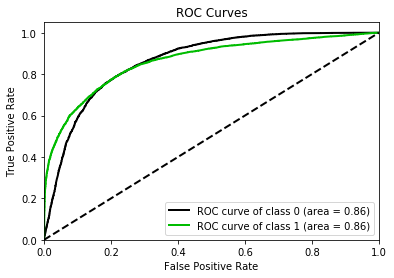

In [51]:
from scikitplot.metrics import plot_roc
plot_roc(y_test,y_pred_xgb_publico_predictproba, plot_micro = False, plot_macro= False)

In [52]:
xgb_auc = roc_auc_score(y_test,y_pred_xgb_publico_predictproba[:,1])
print("El valor del AUC es: ", xgb_auc)

El valor del AUC es:  0.8642601601845428


In [53]:
print(accuracy_score(y_test, y_pred_xgb_publico))
print(recall_score(y_test, y_pred_xgb_publico))
print(precision_score(y_test, y_pred_xgb_publico))

0.6215848763433899
0.963430504945341
0.5709107735019665


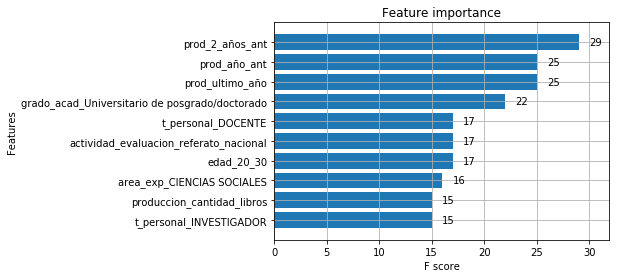

In [54]:
from xgboost import plot_importance
plot_importance(opt_xgb, height = 0.8,max_num_features=10)

In [55]:
print(opt_xgb.feature_importances_)

[0.         0.         0.01066224 0.07463415 0.01138955 0.00879227
 0.00326441 0.00139145 0.00346295 0.00296677 0.01215264 0.01368214
 0.01433402 0.0078898  0.00614405 0.         0.         0.00837935
 0.         0.01081311 0.4354446  0.03928172 0.0096571  0.01389248
 0.00415439 0.02263671 0.00756378 0.00824229 0.00377992 0.00653728
 0.         0.         0.01855309 0.01285052 0.00831451 0.0020852
 0.00503367 0.01059277 0.00518514 0.         0.0083103  0.01083345
 0.00341624 0.00489813 0.04499088 0.0052747  0.00534307 0.
 0.         0.         0.         0.         0.         0.
 0.04790001 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00192199 0.         0.
 0.         0.         0.         0.         0.         0.00595814
 0.         0.         0.00490295 0.         0.         0.
 0.         0.         0.         0.         0.00101954 0.
 0.         0.         0.         0.         0.     

#### 6. Light GBM

In [56]:
import lightgbm as lgb

In [57]:
modelo_LGBM_publico = lgb.LGBMClassifier()

In [58]:
lgbm_publico = RandomizedSearchCV(modelo_LGBM_publico, params, n_iter = 25, verbose= True)

In [59]:
start = time.time()
lgbm_publico.fit(X_train, y_train)
end = time.time()
print("La búsqueda con LightGBM llevó: ", end - start, " segundos")

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   27.7s finished


La búsqueda con LightGBM llevó:  28.004364728927612  segundos


In [60]:
opt_lgbm_publico = lgbm_publico.best_estimator_

In [61]:
y_pred_lgbm_predictproba = opt_lgbm_publico.predict_proba(X_test)

In [62]:
y_pred_lgbm_publico = opt_lgbm_publico.predict(X_test)

In [63]:
lgbm_auc_publico = roc_auc_score(y_test,y_pred_lgbm_predictproba[:,1])
print("El valor del AUC es: ", lgbm_auc_publico)

El valor del AUC es:  0.864585570246322


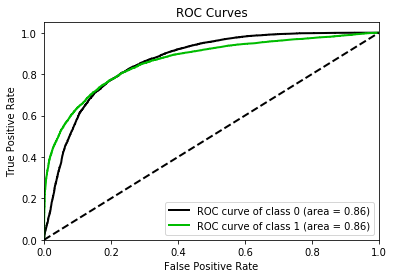

In [64]:
plot_roc(y_test,y_pred_lgbm_predictproba, plot_micro = False, plot_macro= False)

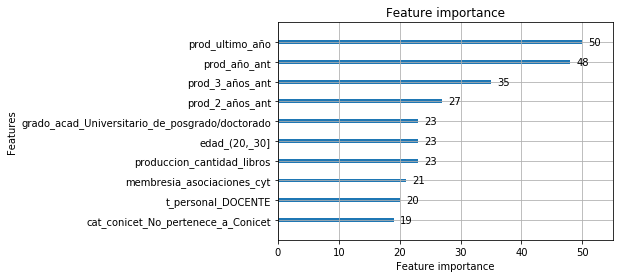

In [65]:
lgb.plot_importance(opt_lgbm_publico, max_num_features=10)

In [66]:
print(accuracy_score(y_test, y_pred_lgbm_publico))
print(recall_score(y_test, y_pred_lgbm_publico))
print(precision_score(y_test, y_pred_lgbm_publico))

0.6402952220639648
0.9575741801145237
0.584524944391484


#### 7. Estimación de las publicaciones en revistas de prestigio para 2021

In [67]:
#Se trabaja con el modelo que mejor dio: Regresión logística

In [68]:
#Lectura de la base 2017
df_2017=pd.read_csv('personas_2017_para_estimar.csv')
df_2017.head()

,Unnamed: 0,persona_id,movilidad_posgrado_exterior,movilidad_estancias_exterior,produccion_cantidad_libros,produccion_patentes_solicitadas,produccion_patentes_otorgadas,actividad_evaluacion_rrhh_becarios,actividad_evaluacion_rrhh_investigadores,actividad_evaluacion_rrhh_premios,...,clase_cargo_docente_Profesor por convenio,clase_cargo_docente_Profesor titular,clase_cargo_docente_Profesor titular plenario,clase_cargo_docente_Profesor visitante,clase_cargo_docente_no docente,area_exp_CIENCIAS MÉDICAS Y DE LA SALUD,area_exp_CIENCIAS NATURALES Y EXACTAS,area_exp_CIENCIAS SOCIALES,area_exp_HUMANIDADES,area_exp_INGENIERÍAS Y TECNOLOGÍAS
0,1,5,0,0,-0.318333,-0.100623,-0.042729,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2,7,0,1,-0.318333,-0.100623,-0.042729,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,9,0,0,-0.318333,-0.100623,-0.042729,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3,4,10,0,0,-0.318333,-0.100623,-0.042729,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,11,0,0,-0.318333,-0.100623,-0.042729,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [69]:
df_2017_original=pd.read_csv('personas_2017_para_estimar.csv')
df_2017_original.head()

,Unnamed: 0,persona_id,movilidad_posgrado_exterior,movilidad_estancias_exterior,produccion_cantidad_libros,produccion_patentes_solicitadas,produccion_patentes_otorgadas,actividad_evaluacion_rrhh_becarios,actividad_evaluacion_rrhh_investigadores,actividad_evaluacion_rrhh_premios,...,clase_cargo_docente_Profesor por convenio,clase_cargo_docente_Profesor titular,clase_cargo_docente_Profesor titular plenario,clase_cargo_docente_Profesor visitante,clase_cargo_docente_no docente,area_exp_CIENCIAS MÉDICAS Y DE LA SALUD,area_exp_CIENCIAS NATURALES Y EXACTAS,area_exp_CIENCIAS SOCIALES,area_exp_HUMANIDADES,area_exp_INGENIERÍAS Y TECNOLOGÍAS
0,1,5,0,0,-0.318333,-0.100623,-0.042729,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2,7,0,1,-0.318333,-0.100623,-0.042729,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,9,0,0,-0.318333,-0.100623,-0.042729,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3,4,10,0,0,-0.318333,-0.100623,-0.042729,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,11,0,0,-0.318333,-0.100623,-0.042729,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [70]:
#Se eliminan columnas que no se usarán
df_2017.drop(columns=['Unnamed: 0','persona_id'],inplace=True)

In [71]:
df_2017.shape

(62553, 122)

In [72]:
X_train.shape

(31360, 124)

In [73]:
#Analizamos las columnas que no se encuentran en una u otra matriz
df_2017.columns ^ X_train.columns

Index(['cat_conicet_Gestión CyT', 'cat_conicet_Investigador correspondiente',
       'clase_cargo_docente_Docente auxiliar alumno',
       'clase_cargo_docente_Docente técnico profesional',
       'clase_cargo_docente_Profesor asistente',
       'clase_cargo_docente_Profesor ayudante A',
       'clase_cargo_docente_Profesor de extensión',
       'clase_cargo_docente_Profesor nivel A',
       'clase_cargo_docente_Profesor nivel B',
       'clase_cargo_docente_Profesor nivel C', 'edad_(10, 20]',
       'edad_(90, 100]'],
      dtype='object')

In [74]:
df_2017['cat_conicet_Gestión CyT']=0
df_2017['clase_cargo_docente_Docente auxiliar alumno']=0
df_2017['clase_cargo_docente_Docente técnico profesional']=0
df_2017['clase_cargo_docente_Profesor asistente']=0
df_2017['clase_cargo_docente_Profesor de extensión']=0
df_2017['clase_cargo_docente_Profesor nivel A']=0
df_2017.drop(columns=['edad_(10, 20]'],inplace=True)
df_2017.drop(columns=['edad_(90, 100]'],inplace=True)

In [75]:
#Analizamos las columnas que no se encuentran en una u otra matriz
df_2017.columns ^ X_train.columns

Index(['cat_conicet_Investigador correspondiente',
       'clase_cargo_docente_Profesor ayudante A',
       'clase_cargo_docente_Profesor nivel B',
       'clase_cargo_docente_Profesor nivel C'],
      dtype='object')

In [76]:
df_2017.drop(columns=['cat_conicet_Investigador correspondiente'],inplace=True)
df_2017.drop(columns=['clase_cargo_docente_Profesor nivel B'],inplace=True)

In [77]:
#Analizamos las columnas que no se encuentran en una u otra matriz
df_2017.columns ^ X_train.columns

Index(['clase_cargo_docente_Profesor ayudante A', 'clase_cargo_docente_Profesor nivel C'], dtype='object')

In [78]:
df_2017['clase_cargo_docente_Profesor ayudante A']=0

In [79]:
df_2017.drop(columns=['clase_cargo_docente_Profesor nivel C'],inplace=True)

In [80]:
#Analizamos las columnas que no se encuentran en una u otra matriz
df_2017.columns ^ X_train.columns

Index([], dtype='object')

In [81]:
#ponemos las columnas en el mismo orden
columnsTitles = X_train.columns
df_2017=df_2017.reindex(columns=columnsTitles)

In [82]:
columnas_2017=pd.DataFrame(df_2017.columns)
columnas_X_train=pd.DataFrame(X_train.columns)

columnas_2017.rename(columns={0:'2017'}, inplace=True)
columnas_X_train.rename(columns={0:'2012'}, inplace=True)

columnas=pd.concat([columnas_2017,columnas_X_train], axis=1)

columnas.loc[columnas['2017']!=columnas['2012']].head()

,2017,2012


In [83]:
y_pred_2017=opt_lgbm_publico.predict(df_2017)

In [84]:
publicara=pd.DataFrame(y_pred_2017)

In [85]:
publicara.rename(columns={0:'publicara'}, inplace=True)

In [86]:
df_2017=pd.concat([df_2017,publicara], axis=1)

In [87]:
df_2017['publicara'].value_counts()

0    31717
1    30836
Name: publicara, dtype: int64

In [88]:
#Analizamos de qué área son los que publicaran


df_2017[['area_exp_CIENCIAS MÉDICAS Y DE LA SALUD','area_exp_CIENCIAS NATURALES Y EXACTAS',
                           'area_exp_CIENCIAS SOCIALES',
                                 'area_exp_HUMANIDADES',
                   'area_exp_INGENIERÍAS Y TECNOLOGÍAS','publicara']].groupby(['publicara']).sum()

,area_exp_CIENCIAS MÉDICAS Y DE LA SALUD,area_exp_CIENCIAS NATURALES Y EXACTAS,area_exp_CIENCIAS SOCIALES,area_exp_HUMANIDADES,area_exp_INGENIERÍAS Y TECNOLOGÍAS
publicara,,,,,
0,3724,4949,11740,5321,3996
1,2914,12908,5803,3248,3394


In [89]:
df_2017_publico_articulo=pd.concat([df_2017_original['persona_id'],
                                    df_2017['publicara']], axis=1)

In [90]:
df_2017_publico_articulo.head()

,persona_id,publicara
0,5,1
1,7,1
2,9,1
3,10,1
4,11,1


In [91]:
df_2017_publico_articulo.to_csv('df_2017_publico_articulo.csv')